# WELCOME!

Welcome to ***"Demand Prediction Project"***. This is the third capstone project.
As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.

In this project, the goal is to predict the number of future bike shares given the historical data of London bike shares. So this case should be handled as a time series problem with ***Bidirectional LSTM***. 

In order to achieve this goal, you will make predictions with LSTM, unlike the machine learning algorithms you have applied before. Long short term memory (LSTM) is an artificial repetitive neural network architecture used in the field of deep learning. Unlike standard feed forward neural networks, LSTM has feedback links. It can process not only single data points but also entire data series. 

Before diving into the project, please take a look at the Determines and Tasks.

- **NOTE:** This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind LSTM.



---
---

# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.


---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.

Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.

In the Pre-Processing task after train test split and robust scaling, the challenge for you will be to divide the data into time steps and transform it into a three dimentional numpy array.

Then in the model building task, build your model appropriate and compare the train and validation losses using a graph. 

When making prediction, you will need to do the inverse transform process to get a true error score. Otherwise, the results you get with scaled target variables may mislead you.

Finally, Visualize how well your model's predictions match the actual values of the test data and also calculate error scores.


- ***Note:*** *What you can do in this project is more than what is asked of you.*


# #Tasks

#### 1. Exploratory Data Analysis

- Check Missing Values and Outliers
- Plot Breakdowns of Data

    *i.  Plot bike shares over time*
    
    *ii.  Plot bike shares by months*
    
    *iii. Plot bike shares by hours*
    
    *iv. Plot bike shares by day of week*
    
    *v. Plot the distribution of bike shares on holidays by seasons*

    
#### 2. Data Pre-Processing

- Train - Test Split
- Scaling
- Define a Function for Creating Time Steps

#### 3. Model Building with LSTM

- Create, Compile and Fit Bidirectional LSTM Model
- Plot Train and Validation Losses

#### 4. Demand Prediction

- Inverse Transform
- Plot Prediction
- Calculate Train and Test Error Scores



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

---
---

## 1. Exploratory Data Analysis

- Firstly, focus data based on the timestamp. You can create various variables such as, hour, day of week, day of month etc.
- You can check missing values and outliers.
- Also you can plot breakdowns of data.

### Check Missing Values and Outliers

In [2]:
df = pd.read_csv('store_sharing.csv')

In [3]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [4]:
df.shape

(17414, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [6]:
df.tail()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0
17413,2017-01-03 23:00:00,139,5.0,1.0,76.0,22.0,2.0,0.0,0.0,3.0


In [7]:
df = pd.read_csv('store_sharing.csv', index_col=0, parse_dates=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  float64
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.3 MB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cnt,17414.0,1143.101642,1085.108068,0.0,257.0,844.0,1671.75,7860.0
t1,17414.0,12.468091,5.571818,-1.5,8.0,12.5,16.00,34.0
t2,17414.0,11.520836,6.615145,-6.0,6.0,12.5,16.00,34.0
hum,17414.0,72.324954,14.313186,20.5,63.0,74.5,83.00,100.0
wind_speed,17414.0,15.913063,7.894570,0.0,10.0,15.0,20.50,56.5
weather_code,17414.0,2.722752,2.341163,1.0,1.0,2.0,3.00,26.0
is_holiday,17414.0,0.022051,0.146854,0.0,0.0,0.0,0.00,1.0
is_weekend,17414.0,0.285403,0.451619,0.0,0.0,0.0,1.00,1.0
season,17414.0,1.492075,1.118911,0.0,0.0,1.0,2.00,3.0


In [10]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


### Plot Breakdowns of Data

In [11]:
# Visualizing with AutoViz
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.


Shape of your Data Set: (17414, 9)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  6
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  2
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    8 Predictors classified...
        This does not include the Target column(s)
        No variables removed since no ID or low-information variables found in data set

################ Regression VISUALIZATION Started #####################


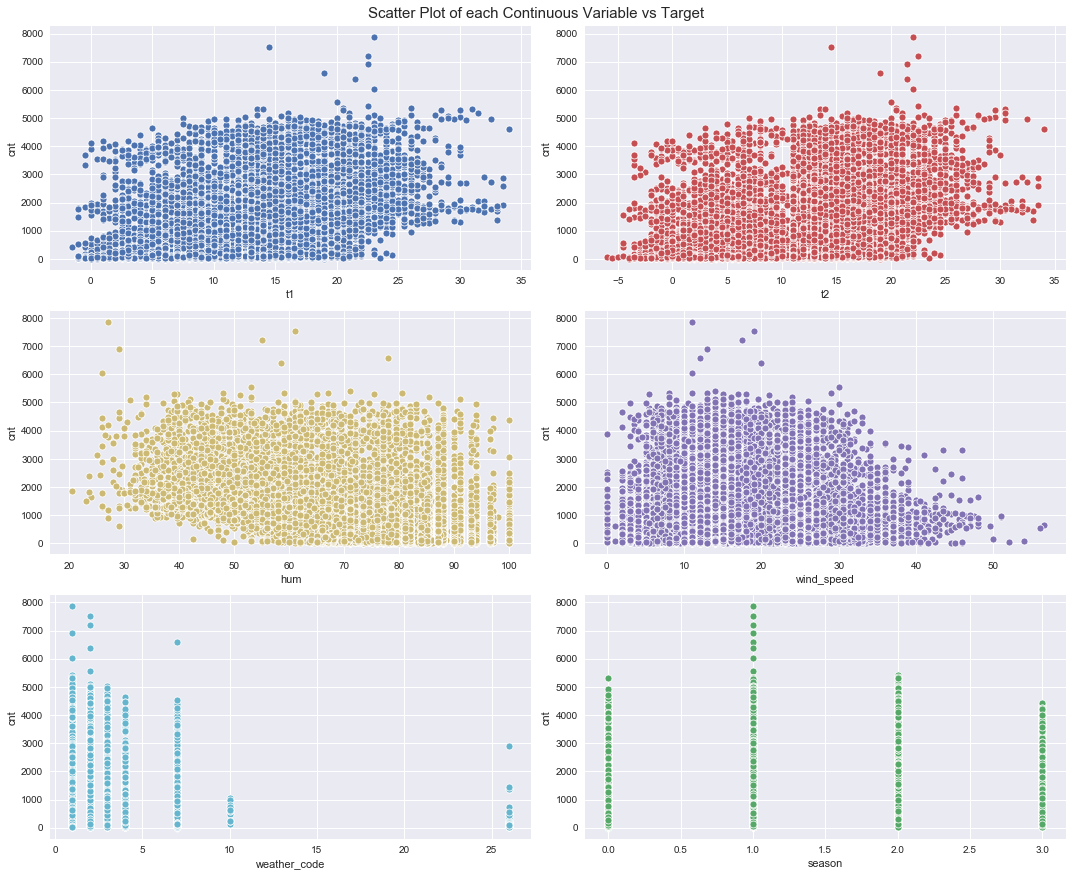

Number of All Scatter Plots = 21


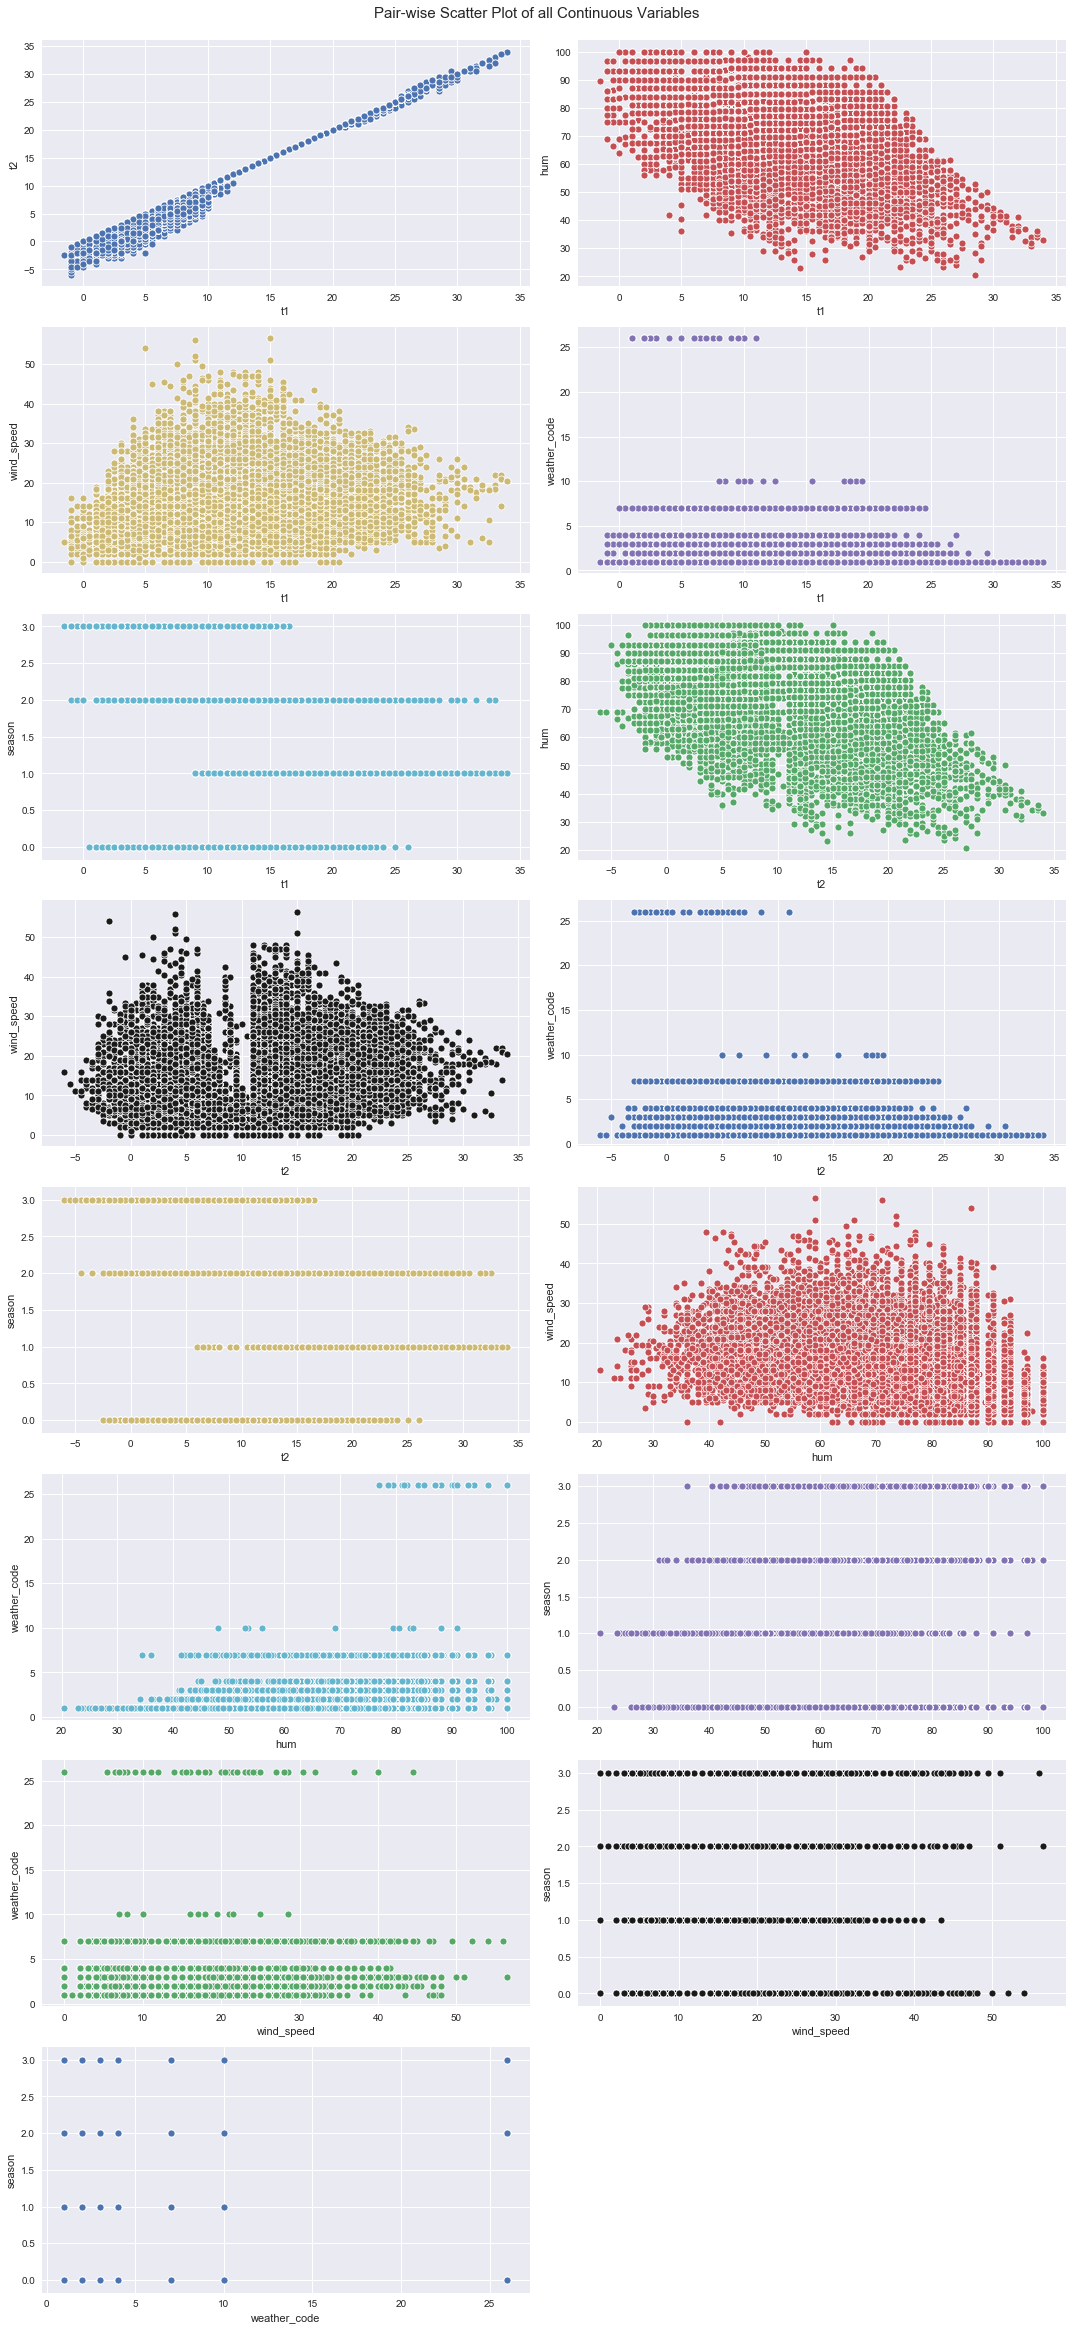

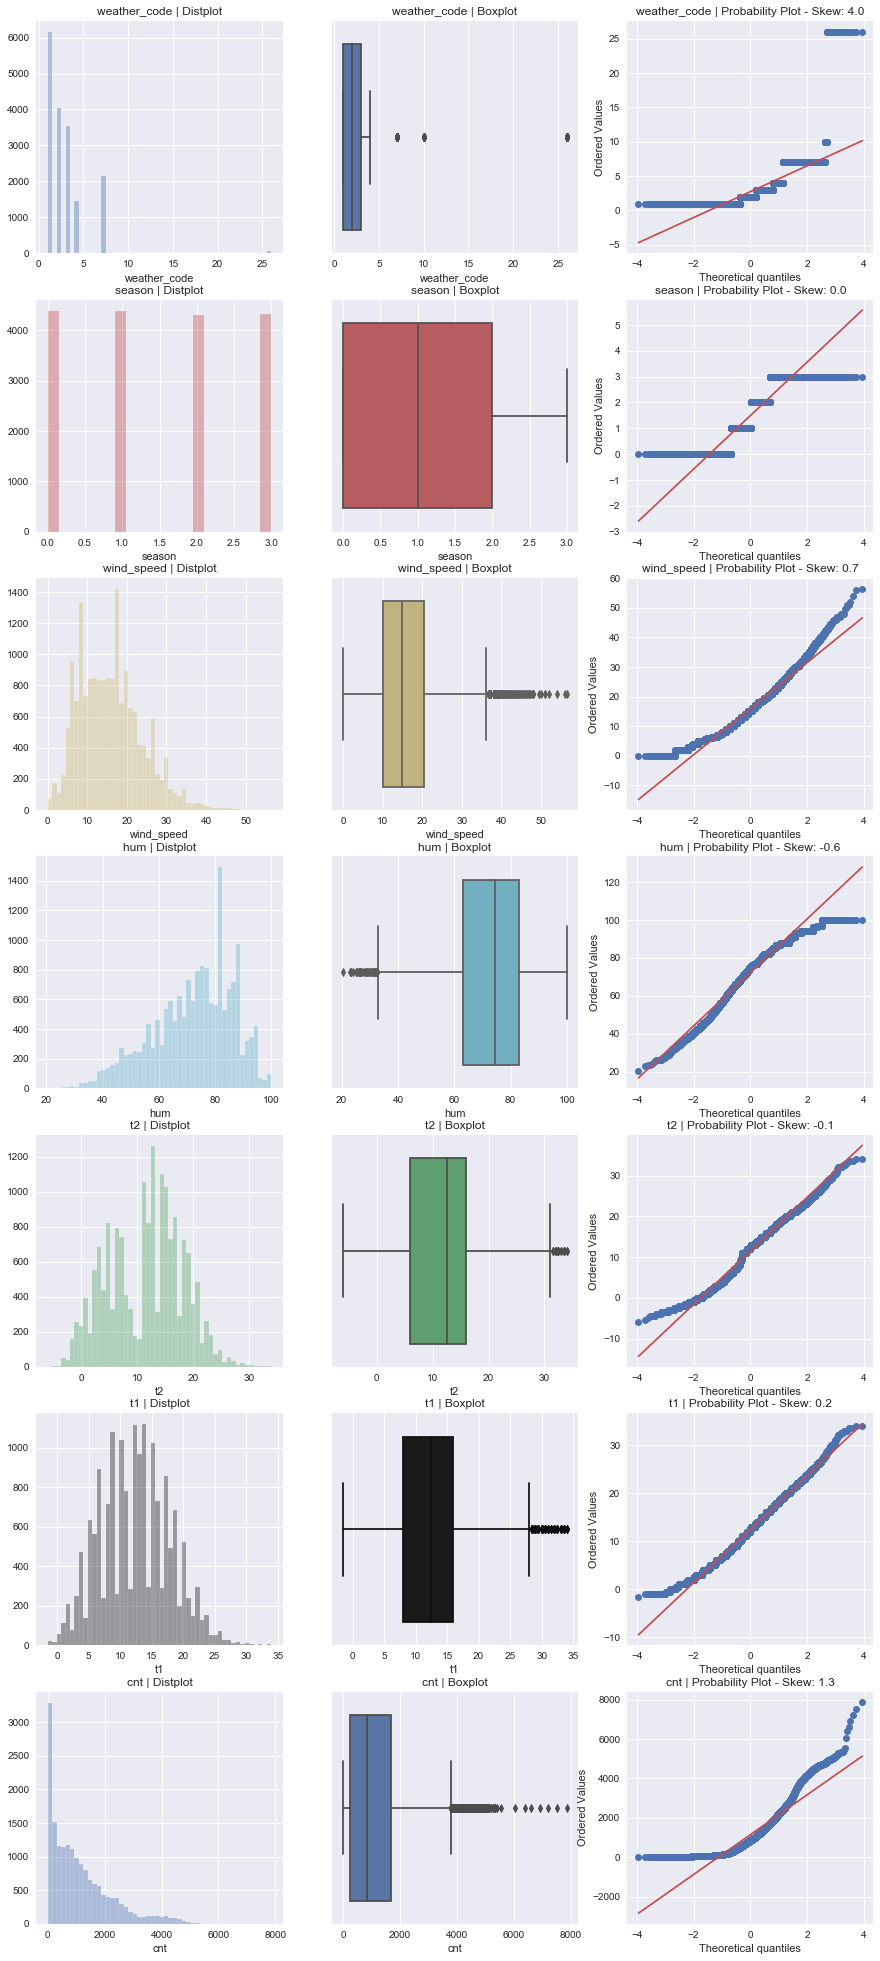

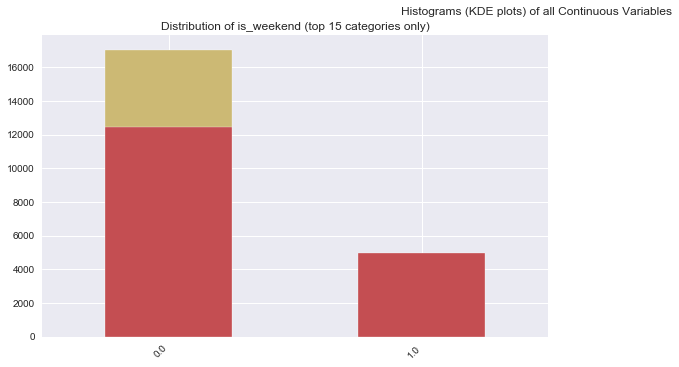

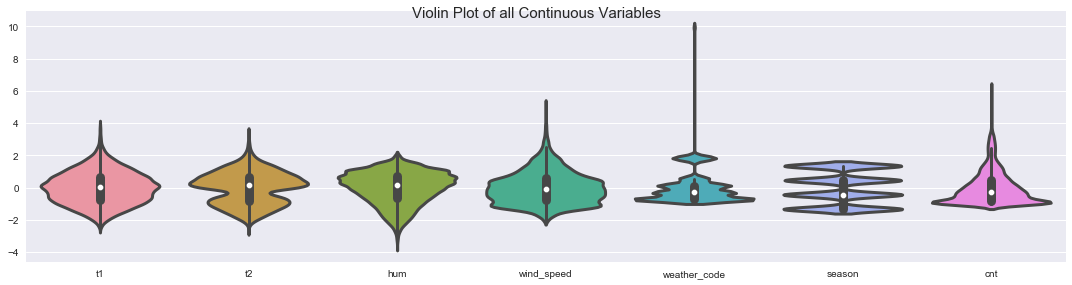

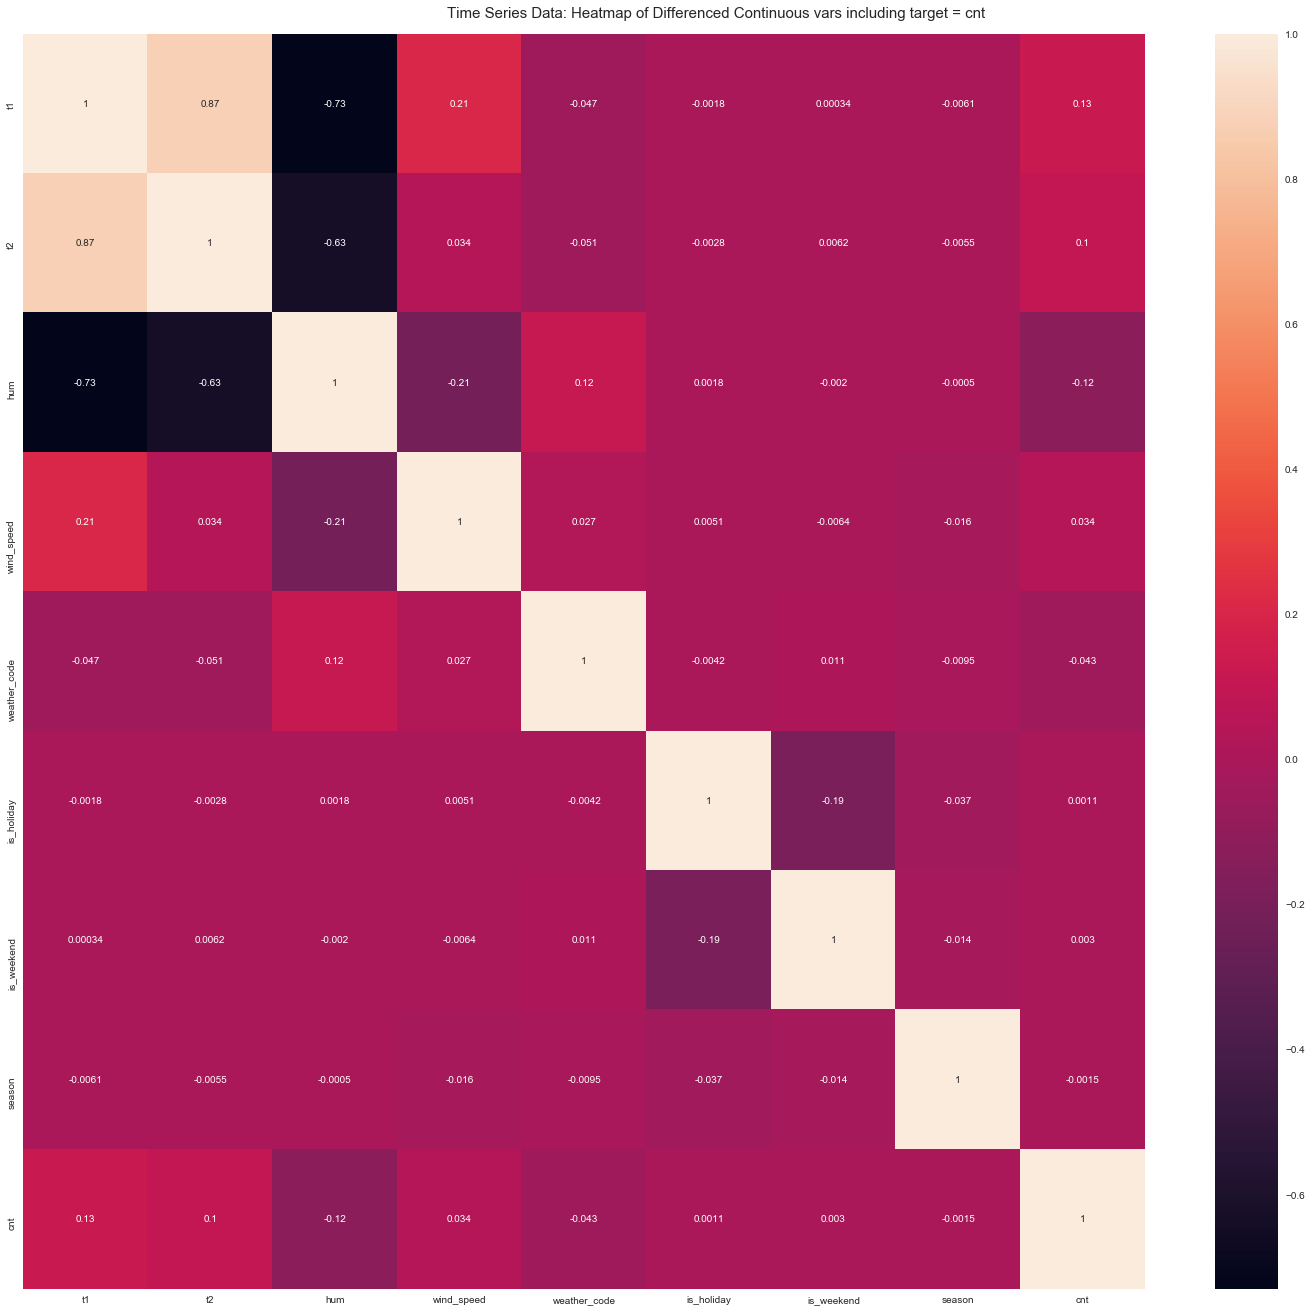

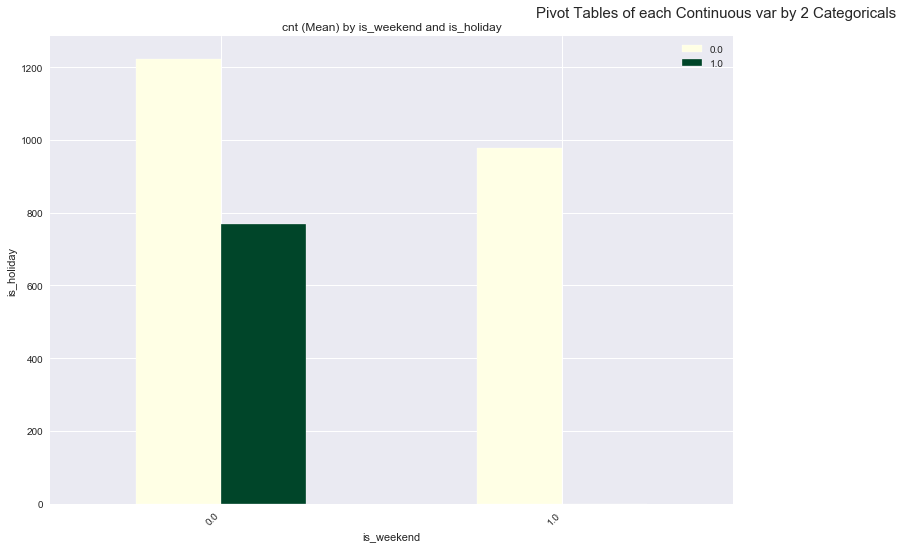

No categorical or numeric vars in data set. Hence no bar charts.
All Plots done
Time to run AutoViz (in seconds) = 19.329

 ###################### VISUALIZATION Completed ########################


In [12]:
dft = AV.AutoViz('',
    depVar="cnt",
    dfte=df)

***i. Plot bike shares over time***

***First we can create individual date/time components***

In [13]:
df1 = df.copy()

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  int64  
 1   t1            17414 non-null  float64
 2   t2            17414 non-null  float64
 3   hum           17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  float64
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.3 MB


In [15]:
# Add columns with year, month, day and weekday name
df1['Year'] = df1.index.year
df1['Month'] = df1.index.month
df1['Day'] = df1.index.day
df1['Hour'] = df1.index.hour
df1['Weekday'] = df1.index.weekday
df1['WeekdayName'] = df1.index.day_name()

In [16]:
df1.index.hour

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9,
            ...
            14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='timestamp', length=17414)

In [17]:
df1.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,Year,Month,Day,Hour,Weekday,WeekdayName
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,4,0,6,Sunday
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,4,1,6,Sunday
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,4,2,6,Sunday
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,4,3,6,Sunday
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,4,4,6,Sunday


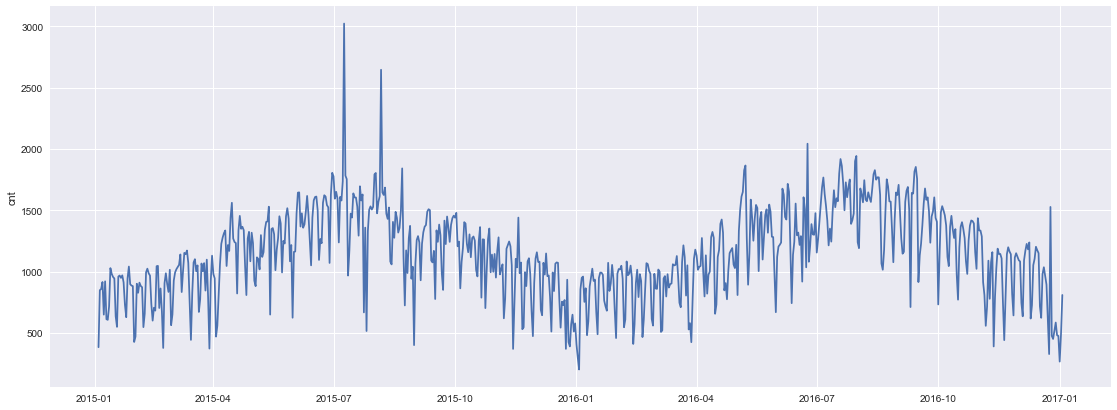

In [18]:
plt.figure(figsize=(19,7))
sns.lineplot(df1.index.date, y=df1.cnt, ci=None)

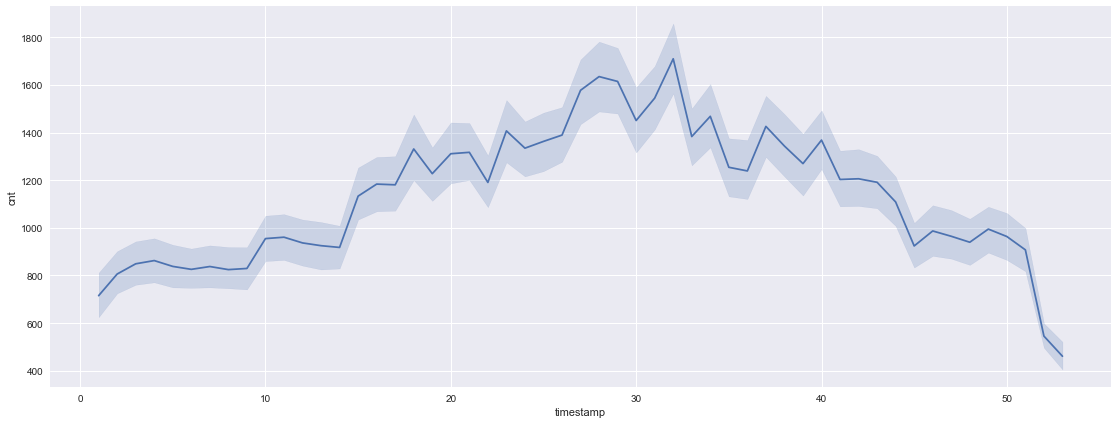

In [19]:
plt.figure(figsize=(19,7))
sns.lineplot(df1.index.week, y=df1.cnt)

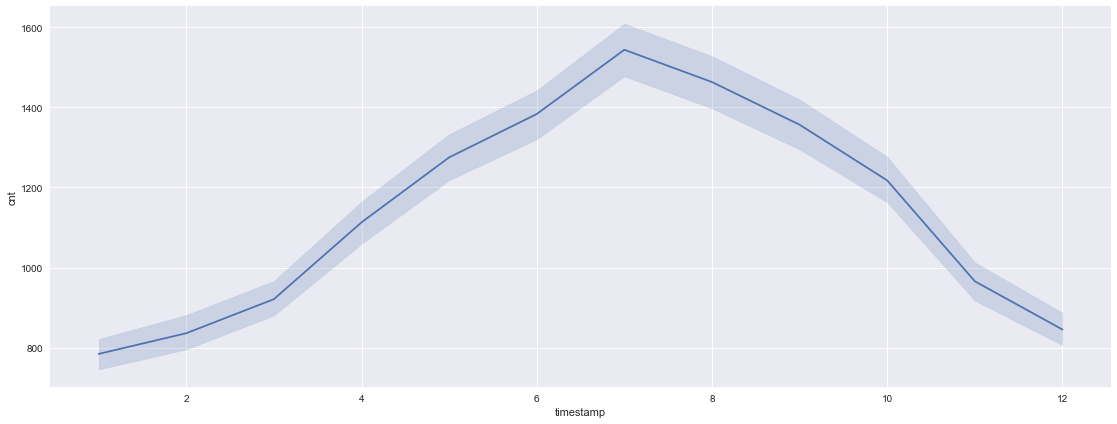

In [20]:
plt.figure(figsize=(19,7))
sns.lineplot(df1.index.month, y=df1.cnt)

***ii. Plot bike shares by months***

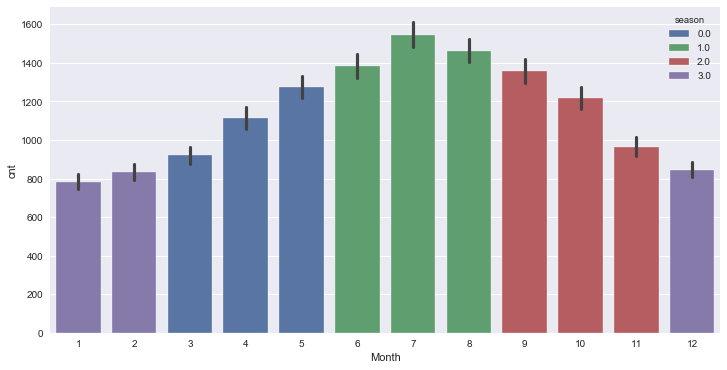

In [21]:
plt.figure(figsize=(12,6))
sns.barplot(data=df1, x='Month',y='cnt', hue='season', dodge=False)

***iii. Plot bike shares by hours***
- *whether it is a holiday or not*
- *You may want to see seasonal breakdowns*

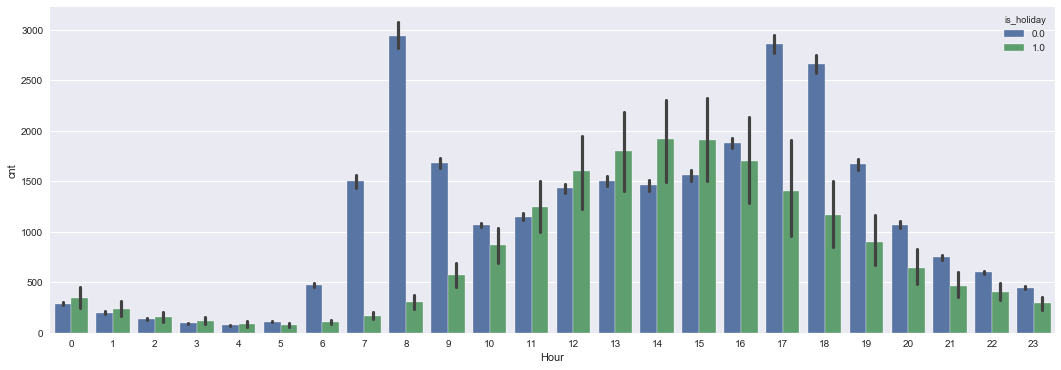

In [22]:
plt.figure(figsize=(18,6))
sns.barplot(data=df1, x='Hour', y='cnt', hue='is_holiday', dodge=True)

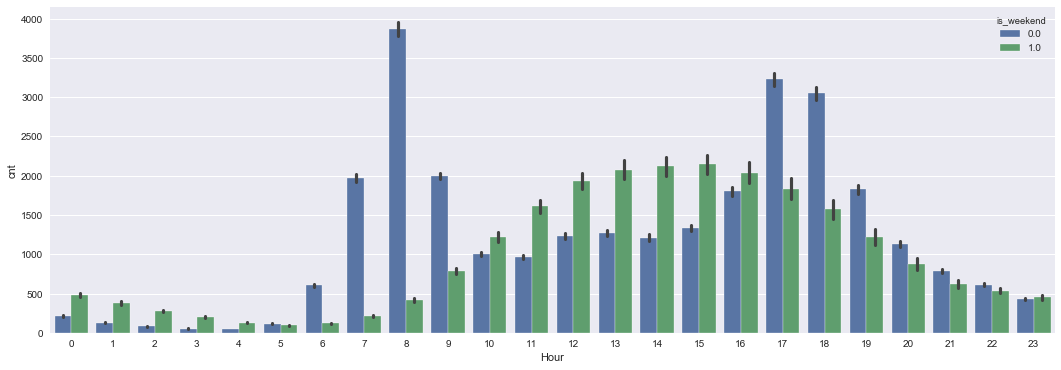

In [23]:
plt.figure(figsize=(18,6))
sns.barplot(data=df1, x='Hour', y='cnt', hue='is_weekend', dodge=True)

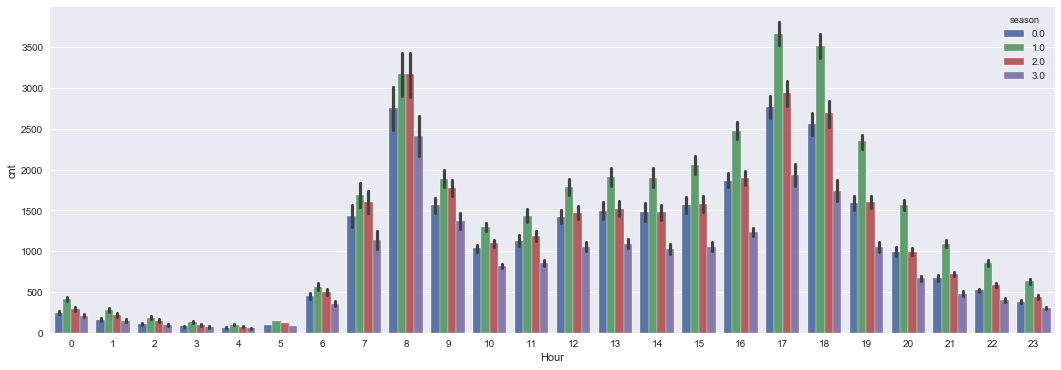

In [24]:
plt.figure(figsize=(18,6))
sns.barplot(data=df1, x='Hour', y='cnt', hue='season', dodge=True)

***As we see from the graphs above, bike share boosts at start and end of work time if it is not holiday.***

***iv. Plot bike shares by day of week***
- *You may want to see seasonal breakdowns*

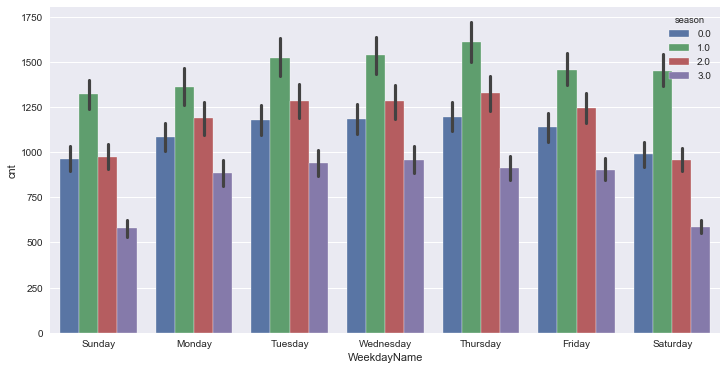

In [25]:
plt.figure(figsize=(12,6))
sns.barplot(data=df1,x='WeekdayName', y='cnt', hue='season', dodge=True)

In [26]:
# Is Friday weekend? No it is not
df1[df1['WeekdayName']=='Friday']['is_weekend'].value_counts()

0.0    2450
Name: is_weekend, dtype: int64

***v. Plot the distribution of bike shares on holidays by seasons***

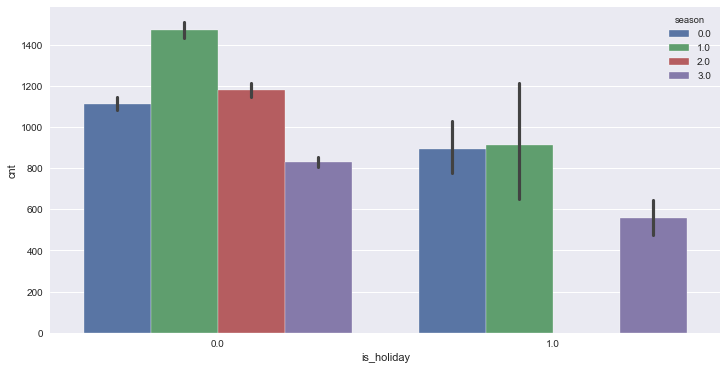

In [27]:
plt.figure(figsize=(12,6))
sns.barplot(x='is_holiday', y='cnt', data=df1, hue='season', dodge=True)

*** No bike share on holidays in the Autumn. ***

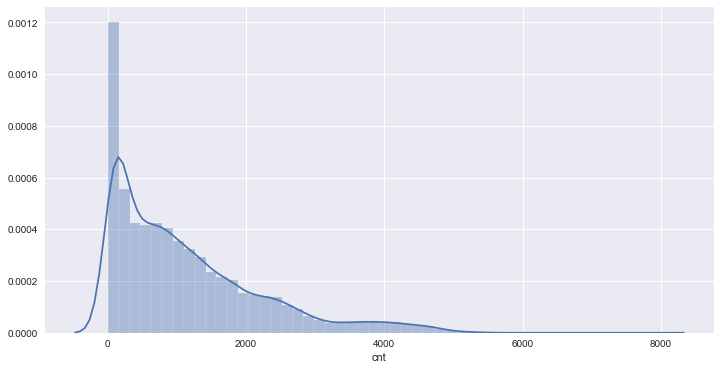

In [28]:
plt.figure(figsize=(12,6))
sns.distplot(df1['cnt'])

In [29]:
df1[df1.season==2.0]['is_holiday'].value_counts()

0.0    4303
Name: is_holiday, dtype: int64

***No bike share on holiday in autumn.***

### EDA

***Let's take a breath and determine the specific columns that we will go to model building***

In [30]:
df1[df1['is_weekend']==1.0]['is_holiday'].value_counts()

0.0    4970
Name: is_holiday, dtype: int64

In [31]:
df1[df1['is_holiday']==1.0]['is_weekend'].value_counts()

0.0    384
Name: is_weekend, dtype: int64

- Here we understand that "is_holiday" column is just the days which are not weekend. So we should keep this column.
- Also we should use some columns which we interpreted from the timestamp. These are:
 -- Month, hour and weekday columns.
- Another challenge is that the weather_code has many numbers and we can group them simply as follows.

-  “weather_code” category description: 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity, 2 = scattered clouds / few clouds , 3 = Broken clouds , 4 = Cloudy, 7 = Rain/ light Rain shower/ Light rain, 10 = rain with thunderstorm, 26 = snowfall, 94 = Freezing Fog

https://machinelearningmastery.com/develop-bidirectional-lstm-sequence-classification-python-keras/

https://github.com/curiousily/Deep-Learning-For-Hackers/blob/master/12.time-series-demand_prediction.ipynb

https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

In [32]:
df1['weather_cat']=df.weather_code.apply(lambda x: 'good' if x in [1,2] else ('mid' if x in [3,4] else 'bad'))

In [33]:
df1.columns

Index(['cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday',
       'is_weekend', 'season', 'Year', 'Month', 'Day', 'Hour', 'Weekday',
       'WeekdayName', 'weather_cat'],
      dtype='object')

***Now we are dropping the columns which are not so important***
- t2 has a full correlation with t1, dropping t2
- We have the season info in Month column, dropping season
- We also have the weekend info in Weekday, dropping is_weekend

In [34]:
df1.drop(['weather_code', 'is_weekend', 't2', 'season', 'Year', 'Day', 'WeekdayName'], axis=1, inplace=True)

In [35]:
df1.head()

,cnt,t1,hum,wind_speed,is_holiday,Month,Hour,Weekday,weather_cat
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,93.0,6.0,0.0,1,0,6,mid
2015-01-04 01:00:00,138,3.0,93.0,5.0,0.0,1,1,6,good
2015-01-04 02:00:00,134,2.5,96.5,0.0,0.0,1,2,6,good
2015-01-04 03:00:00,72,2.0,100.0,0.0,0.0,1,3,6,good
2015-01-04 04:00:00,47,2.0,93.0,6.5,0.0,1,4,6,good


***Get_dummies would be a nice choice of label encoding***

In [36]:
df_bike = pd.get_dummies(df1, columns=['Month', 'Hour', 'Weekday',
    'weather_cat'], drop_first=True)
df_bike.sample(6)

,cnt,t1,hum,wind_speed,is_holiday,Month_2,Month_3,Month_4,Month_5,Month_6,...,Hour_22,Hour_23,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Weekday_5,Weekday_6,weather_cat_good,weather_cat_mid
timestamp,,,,,,,,,,,,,,,,,,,,,
2015-11-14 02:00:00,226,9.0,71.0,24.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2016-03-11 05:00:00,106,1.0,100.0,5.0,0.0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2015-05-06 04:00:00,48,10.0,85.0,22.0,0.0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2015-11-23 12:00:00,899,7.0,68.5,9.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2016-10-26 16:00:00,2050,16.0,68.0,19.5,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2015-09-20 17:00:00,2507,19.0,56.0,13.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


---
---

## 2. Data Pre-Processing


In [37]:
df_bike.describe().T

,count,mean,std,min,25%,50%,75%,max
cnt,17414.0,1143.101642,1085.108068,0.0,257.0,844.0,1671.75,7860.0
t1,17414.0,12.468091,5.571818,-1.5,8.0,12.5,16.00,34.0
hum,17414.0,72.324954,14.313186,20.5,63.0,74.5,83.00,100.0
wind_speed,17414.0,15.913063,7.894570,0.0,10.0,15.0,20.50,56.5
is_holiday,17414.0,0.022051,0.146854,0.0,0.0,0.0,0.00,1.0
Month_2,17414.0,0.078041,0.268243,0.0,0.0,0.0,0.00,1.0
Month_3,17414.0,0.084300,0.277845,0.0,0.0,0.0,0.00,1.0
Month_4,17414.0,0.082577,0.275250,0.0,0.0,0.0,0.00,1.0
Month_5,17414.0,0.085448,0.279556,0.0,0.0,0.0,0.00,1.0
Month_6,17414.0,0.081658,0.273851,0.0,0.0,0.0,0.00,1.0


### Train - Test Split

Appropriately split the data for optimum training. But this time we will go on with the original dataset. Since we will scale only the wanted columns.

In [38]:
train_size = int(len(df) * 0.9)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

15672 1742


In [39]:
train

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...
2016-10-23 03:00:00,217,8.0,7.0,90.0,6.0,2.0,0.0,1.0,2.0
2016-10-23 04:00:00,150,8.0,7.0,93.0,6.0,2.0,0.0,1.0,2.0
2016-10-23 05:00:00,107,8.0,8.0,87.0,4.0,3.0,0.0,1.0,2.0


In [40]:
test

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2016-10-23 08:00:00,319,8.0,7.0,87.0,6.0,2.0,0.0,1.0,2.0
2016-10-23 09:00:00,744,9.5,8.0,79.0,10.0,2.0,0.0,1.0,2.0
2016-10-23 10:00:00,1359,10.5,9.5,74.0,15.0,3.0,0.0,1.0,2.0
2016-10-23 11:00:00,1900,12.0,12.0,69.5,22.0,2.0,0.0,1.0,2.0
2016-10-23 12:00:00,2166,12.0,12.0,67.0,24.0,2.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0


### Scaling

**Robust Scaling**

It is common to scale data prior to fitting a machine learning model.

This is because data often consists of many different input variables or features (columns) and each may have a different range of values or units of measure, such as feet, miles, kilograms, dollars, etc.

If there are input variables that have very large values relative to the other input variables, these large values can dominate or skew some machine learning algorithms. The result is that the algorithms pay most of their attention to the large values and ignore the variables with smaller values.

LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing. You can easily normalize the dataset using the Robust Scaling preprocessing class from the scikit-learn library.

- ***Note:*** *You are expected to scale only 't1', 't2', 'hum', 'wind_speed' variables. You also need to scale the dependent and independent variables separately. You must do this for both train data and test data.*

In [41]:
from sklearn.preprocessing import RobustScaler

In [42]:
columns = ['cnt','t1', 't2', 'hum', 'wind_speed']

In [43]:
scaler = RobustScaler()

In [44]:
train.loc[:, columns] = scaler.fit_transform(train[columns].to_numpy())

In [45]:
test.loc[:, columns] = scaler.transform(test[columns].to_numpy())

##### After Scaling

In [46]:
train

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,-0.464876,-1.2500,-1.047619,0.975,-0.818182,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,-0.495179,-1.2500,-1.000000,0.975,-0.909091,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,-0.497934,-1.3125,-1.000000,1.150,-1.363636,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,-0.540634,-1.3750,-1.047619,1.325,-1.363636,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,-0.557851,-1.3750,-1.238095,0.975,-0.772727,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...
2016-10-23 03:00:00,-0.440771,-0.6250,-0.571429,0.825,-0.818182,2.0,0.0,1.0,2.0
2016-10-23 04:00:00,-0.486915,-0.6250,-0.571429,0.975,-0.818182,2.0,0.0,1.0,2.0
2016-10-23 05:00:00,-0.516529,-0.6250,-0.476190,0.675,-1.000000,3.0,0.0,1.0,2.0


In [47]:
test

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2016-10-23 08:00:00,-0.370523,-0.6250,-0.571429,0.675,-0.818182,2.0,0.0,1.0,2.0
2016-10-23 09:00:00,-0.077824,-0.4375,-0.476190,0.275,-0.454545,2.0,0.0,1.0,2.0
2016-10-23 10:00:00,0.345730,-0.3125,-0.333333,0.025,0.000000,3.0,0.0,1.0,2.0
2016-10-23 11:00:00,0.718320,-0.1250,-0.095238,-0.200,0.636364,2.0,0.0,1.0,2.0
2016-10-23 12:00:00,0.901515,-0.1250,-0.095238,-0.325,0.818182,2.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,0.127410,-1.0000,-1.142857,0.375,0.363636,3.0,0.0,0.0,3.0
2017-01-03 20:00:00,-0.217631,-1.0000,-1.142857,0.375,0.545455,4.0,0.0,0.0,3.0
2017-01-03 21:00:00,-0.358127,-0.9375,-1.095238,0.250,0.818182,4.0,0.0,0.0,3.0


### Define a Function for Creating Time Steps 

In order to use the capabilities of LSTM, we need to organize the data in accordance with the working principles of LSTM.
You must separate the lines ordered by time in decimal steps.
The size of the step may vary depending on the situation, in this case it is set to 10.

Therefore, train and test data should be divided into groups of ten.
When predicting test data, the model is asked to use the information from the next 10 records with itself for each record.

As a result of this operation, each row will create a time step with the next 10 records, and you will have a matrix consisting of steps as many as the row total at the beginning.
So, your data set must be a 3-dimensional numpy array like (15662, 10,13).
As a result, LSTM will learn by taking 10 rows into account for one row.

Create a function, that takes two arguments: the dataset(dependent or independent variables separately), which is a NumPy array that we want to convert into a dataset, and the time_steps, which is the number of previous time steps to use as input variables to predict the next time period.

After defining the function, apply it to train and test sets.

In [48]:
# defining the time_step function for LSTM
def split_sequence(X, y, n_steps=12):
    Xs, ys = list(), list()
    for i in range(len(X) - n_steps):
        v = X.iloc[i: (i + n_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + n_steps])
    return np.array(Xs), np.array(ys)

In [49]:
# reshape to [samples, n_steps(choosing 12), n_features]
n_steps = 12
X_train, y_train = split_sequence(train, train.cnt, n_steps)
X_test, y_test = split_sequence(test, test.cnt, n_steps)

print(X_train.shape, y_train.shape)

(15660, 12, 9) (15660,)


In [50]:
X_train[0]

array([[-0.46487603, -1.25      , -1.04761905,  0.975     , -0.81818182,
         3.        ,  0.        ,  1.        ,  3.        ],
       [-0.49517906, -1.25      , -1.        ,  0.975     , -0.90909091,
         1.        ,  0.        ,  1.        ,  3.        ],
       [-0.49793388, -1.3125    , -1.        ,  1.15      , -1.36363636,
         1.        ,  0.        ,  1.        ,  3.        ],
       [-0.54063361, -1.375     , -1.04761905,  1.325     , -1.36363636,
         1.        ,  0.        ,  1.        ,  3.        ],
       [-0.55785124, -1.375     , -1.23809524,  0.975     , -0.77272727,
         1.        ,  0.        ,  1.        ,  3.        ],
       [-0.55853994, -1.375     , -1.04761905,  0.975     , -1.        ,
         1.        ,  0.        ,  1.        ,  3.        ],
       [-0.55509642, -1.5       , -1.33333333,  1.325     , -0.72727273,
         4.        ,  0.        ,  1.        ,  3.        ],
       [-0.53856749, -1.5       , -1.33333333,  1.325     , -0

---
---

## 3. Model Building with LSTM



##Recurrent Neural Networks 
RNN are a type of artifcial neural network designed to recognize patterns in sequences of data, such as text, genomes, handwriting, the spoken word, numerical times series data.

Recurrent Neural Networks use backpropagation algorithm for training. Because of their internal memory, RNN’s are able to remember important things about the input they received, which enables them to be very precise in predicting what’s coming next.

RNNs could be stacked up to deeper versions, which contain more than 1 layers of RNN. Because RNNs are especially computationally expensive to train, normally a deep RNN model contains no more than 3 layers of LSTM.

Train a bidirectional long short term memory (LSTM) recurrent neural network (RNN) with this data, making use of the self-loop and forget gate of LSTM.

LSTM sequential learning model was chosen because of its ability to process sequential data and memorize data of past time steps.

LSTM is a different type of gated RNN which is capable of learning long-term dependencies LSTM is not affected by vanishing gradient or exploding gradient problem
Using Bidirectional LSTMs, we feed the learning algorithm with the original data once from beginning to the end and once from end to beginning.

#### Bidirectional LSTM :
Bidirectional LSTMs are an extension of traditional LSTMs that can improve model performance on sequence classification problems.

In problems where all timesteps of the input sequence are available, Bidirectional LSTMs train two instead of one LSTMs on the input sequence. The first on the input sequence as-is and the second on a reversed copy of the input sequence. This can provide additional context to the network and result in faster and even fuller learning on the problem. Figure shows the mechanism of Bidirectional LSTM.






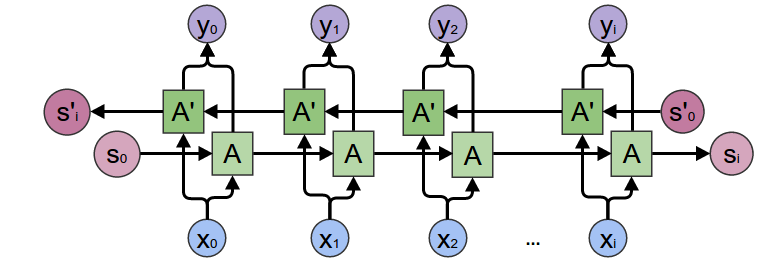

### Create, Compile and Fit Bidirectional LSTM Model

- Create a Sequential Model,
- Add Bidirectional layers,
- Apply Regularization (Drop Out),
- Compile the model.

***Note:*** *Define the optimizer as the efficient stochastic gradient descent algorithm ***adam***.* *This is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems.*

*In this case, use ***mean squared error*** as the loss argument. This loss is for a regression problems and is defined in Keras as mean_squared_error.
Also use defined in Keras as ***accuracy*** as the metrics.*

### Plot Train and Validation Losses

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, LSTM, Bidirectional, Dropout
from tensorflow.keras.optimizers import Adam

In [52]:
model = Sequential()
model.add(Bidirectional(
    LSTM(
    units=128, 
    input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(Dropout(rate=0.2))
model.add(Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [53]:
history = model.fit(
    X_train, y_train, 
    epochs=30, 
    batch_size=32, 
    validation_split=0.1,
    shuffle=False
)

Epoch 1/30
441/441 [==============================] - 12s 19ms/step - loss: 0.2595 - val_loss: 0.1060
Epoch 2/30
441/441 [==============================] - 6s 14ms/step - loss: 0.0959 - val_loss: 0.0489
Epoch 3/30
441/441 [==============================] - 6s 14ms/step - loss: 0.0441 - val_loss: 0.0340
Epoch 4/30
441/441 [==============================] - 5s 12ms/step - loss: 0.0326 - val_loss: 0.0299
Epoch 5/30
441/441 [==============================] - 5s 12ms/step - loss: 0.0268 - val_loss: 0.0283
Epoch 6/30
441/441 [==============================] - 5s 12ms/step - loss: 0.0240 - val_loss: 0.0240
Epoch 7/30
441/441 [==============================] - 5s 12ms/step - loss: 0.0216 - val_loss: 0.0206
Epoch 8/30
441/441 [==============================] - 5s 12ms/step - loss: 0.0190 - val_loss: 0.0229
Epoch 9/30
441/441 [==============================] - 6s 13ms/step - loss: 0.0194 - val_loss: 0.0220
Epoch 10/30
441/441 [==============================] - 5s 12ms/step - loss: 0.0188 - val_l

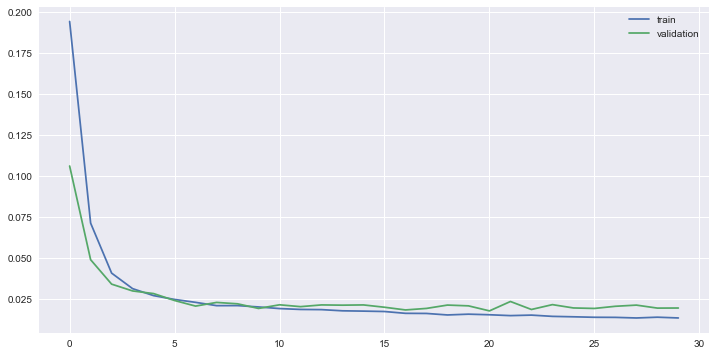

In [54]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend();

---
---

## 4. Demand Predictions

At this stage, we will measure the prediction success of your model. So, we will need to compare the actual values of the test data with their predicted values. 

For this reason, we must inverse transform the y_pred variable predicted by the model with the target variables of the train and test data we have previously scaled.

In [132]:
y_pred = model.predict(X_test)

In [133]:
y_pred

array([[-0.12702808],
       [-0.24777058],
       [-0.3146348 ],
       ...,
       [-0.23882729],
       [-0.320625  ],
       [-0.3872278 ]], dtype=float32)

### Inverse Transform
*Scale back the data to the original representation. For this lets turn back to non-scaled form*

In [119]:
train_size = int(len(df) * 0.9)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

15672 1742


In [120]:
cnt_transformer = RobustScaler()

In [121]:
cnt_transformer = cnt_transformer.fit(train[['cnt']]) # We should turn back to train-test split iot have original data

In [122]:
train[['cnt']]

,cnt
timestamp,
2015-01-04 00:00:00,182
2015-01-04 01:00:00,138
2015-01-04 02:00:00,134
2015-01-04 03:00:00,72
2015-01-04 04:00:00,47
...,...
2016-10-23 03:00:00,217
2016-10-23 04:00:00,150
2016-10-23 05:00:00,107


In [123]:
y_train_inv = cnt_transformer.inverse_transform(y_train.reshape(1,-1))

In [124]:
y_test_inv = cnt_transformer.inverse_transform(y_test.reshape(1,-1))

In [134]:
y_pred_inv = cnt_transformer.inverse_transform(y_pred)

In [135]:
y_train

array([ 0.00344353,  0.04063361,  0.12534435, ..., -0.51652893,
       -0.51652893, -0.47107438])

In [136]:
y_train_inv

array([[ 862.,  916., 1039., ...,  107.,  107.,  173.]])

In [137]:
y_train_inv.flatten()

array([ 862.,  916., 1039., ...,  107.,  107.,  173.])

In [138]:
np.arange(0, len(y_train))

array([    0,     1,     2, ..., 15657, 15658, 15659])

In [139]:
y_pred_inv

array([[672.55524],
       [497.23712],
       [400.15027],
       ...,
       [510.22278],
       [391.45248],
       [294.74524]], dtype=float32)

### Plot Prediction

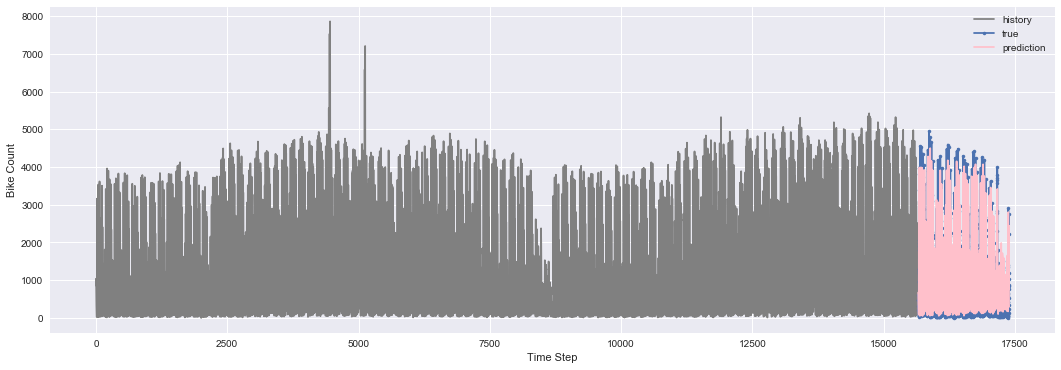

In [140]:
plt.figure(figsize=(18,6))
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'gray', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'pink', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

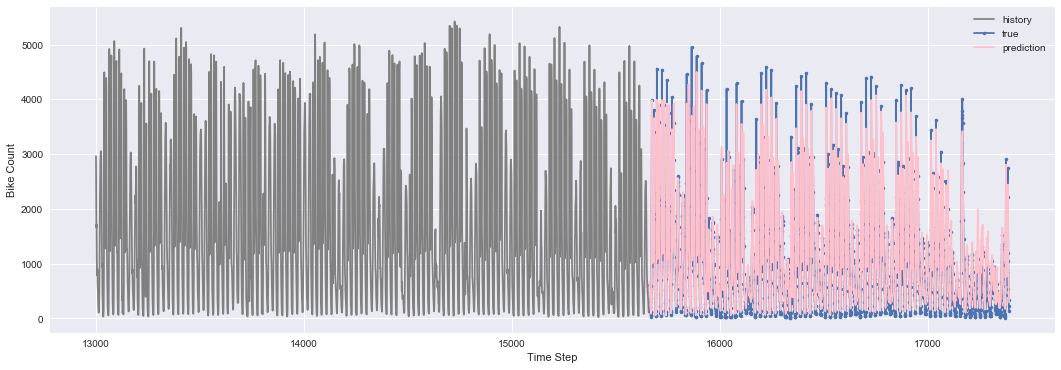

In [141]:
plt.figure(figsize=(18,6))
plt.plot(np.arange(13000, len(y_train)), y_train_inv.flatten()[13000:], 'gray', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'pink', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

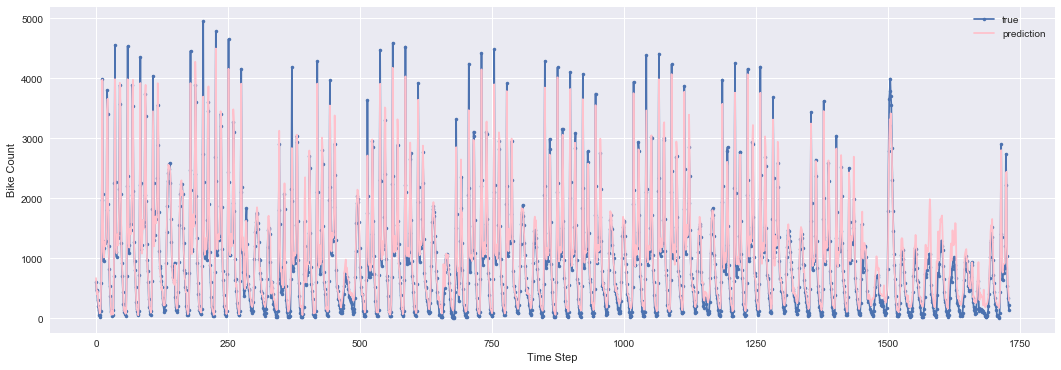

In [142]:
plt.figure(figsize=(18,6))
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'pink', label="prediction")
plt.ylabel('Bike Count')
plt.xlabel('Time Step')
plt.legend()
plt.show();

### Calculate Train and Test Error Scores

In [143]:
from sklearn import metrics
from tensorflow.keras.metrics import MeanSquaredError

In [144]:
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  0.09637464677869625
MSE:  0.01885122546287564
RMSE:  0.13729976497749602


In [145]:
mse = MeanSquaredError()
mse.update_state(y_test, y_pred)
mse.result().numpy()

0.018851226

In [100]:
test

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2016-10-23 08:00:00,-0.370523,-0.6250,-0.571429,0.675,-0.818182,2.0,0.0,1.0,2.0
2016-10-23 09:00:00,-0.077824,-0.4375,-0.476190,0.275,-0.454545,2.0,0.0,1.0,2.0
2016-10-23 10:00:00,0.345730,-0.3125,-0.333333,0.025,0.000000,3.0,0.0,1.0,2.0
2016-10-23 11:00:00,0.718320,-0.1250,-0.095238,-0.200,0.636364,2.0,0.0,1.0,2.0
2016-10-23 12:00:00,0.901515,-0.1250,-0.095238,-0.325,0.818182,2.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,0.127410,-1.0000,-1.142857,0.375,0.363636,3.0,0.0,0.0,3.0
2017-01-03 20:00:00,-0.217631,-1.0000,-1.142857,0.375,0.545455,4.0,0.0,0.0,3.0
2017-01-03 21:00:00,-0.358127,-0.9375,-1.095238,0.250,0.818182,4.0,0.0,0.0,3.0


In [101]:
train_df = test.iloc[-11:-1]
test_df = test.iloc[-1:]

In [102]:
train_df = train_df.to_numpy().reshape(1,10,9)

In [103]:
test_df

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2017-01-03 23:00:00,-0.49449,-1.0,-1.142857,0.125,0.636364,2.0,0.0,0.0,3.0


In [104]:
y_pred = model.predict(train_df)

In [105]:
y_pred

array([[-0.27805436]], dtype=float32)

In [106]:
mse = MeanSquaredError()
mse.update_state(-0.49449, y_pred)
mse.result().numpy()

0.046844386